### Jupyter Notebook for Section 3 - Unsupervised learning - clustering

In [2]:
# Imports of useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
# Dataset loading
df=pd.read_csv('RTP_traffic_dataset.csv')

In [3]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
df.head(2)

,timestamp,interarrival_std,interarrival_mean,interarrival_min,interarrival_max,interarrival_count,interarrival_kurtosis,interarrival_skew,interarrival_moment3,interarrival_moment4,...,inter_time_sequence_max_value_count_percent,num_packet_loss,software,ssrc,ip_src,ip_dst,prt_src,prt_dst,p_type,n_call
0,2020-12-14 13:34:39.500,0.011279,0.011439,0.002316,0.024050,3,-1.500000,0.513926,4.014318e-07,1.079044e-08,...,0.333333,0,webrtc,0x401fff15,132.145.230.5,192.168.1.126,443,34102,114,1
1,2020-12-14 13:34:40.000,0.060211,0.057982,0.023297,0.203912,8,2.675447,2.093476,3.740255e-04,5.710986e-05,...,0.125000,0,webrtc,0x401fff15,132.145.230.5,192.168.1.126,443,34102,114,1


### <ins>Point 1.</ins>

In [5]:
to_be_deleted = ['timestamp', 'software','ssrc','ip_dst','ip_src']
features_to_stand = df.drop(to_be_deleted, axis=1).columns
features_to_stand.shape

(78,)

In [6]:
scaler = StandardScaler()
scaler.fit(df[features_to_stand])

df_stand = scaler.transform(df[features_to_stand])

In [7]:
df_stand = pd.DataFrame(df_stand,columns=features_to_stand)


In [8]:
print(f'The number of unique payloads is: {len(list(set(df_stand['p_type'])))}')

The number of unique payloads is: 11


### <ins>Point 2.</ins>

<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
C:\Users\utente\AppData\Local\Temp\ipykernel_11416\202275607.py:20: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'45 PCs explain {round(perc_cumul_exp_var[44], 2)}% of $\sigma^2$')


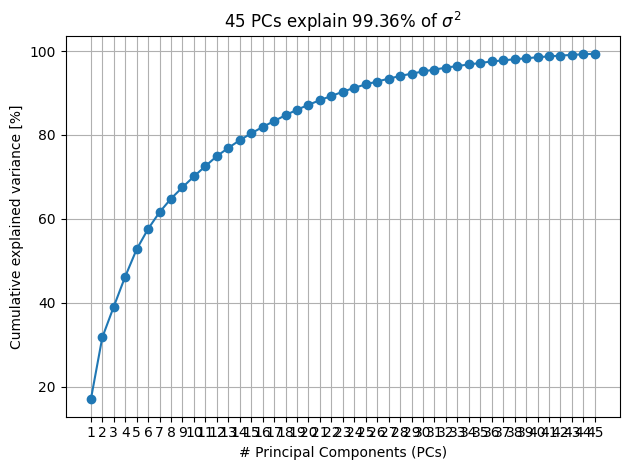

In [38]:
pca = PCA(n_components=45)
pca.fit(df_stand)

# describe how much of the dataset variability is indicated by a given amount of features
explained_variance = pca.explained_variance_ratio_

# evaluate the total dataset variability while increasing the variables
cumul_exp_var = np.cumsum(explained_variance)

# percentage value to better understand the best number of components
perc_cumul_exp_var = cumul_exp_var * 100

# make the plot of cumulative explained variance wrt number of components
plt.figure()
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.xticks([i for i in range(45)], [i for i in range(1,46)])
plt.grid()
plt.title(f'45 PCs explain {round(perc_cumul_exp_var[44], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.show()

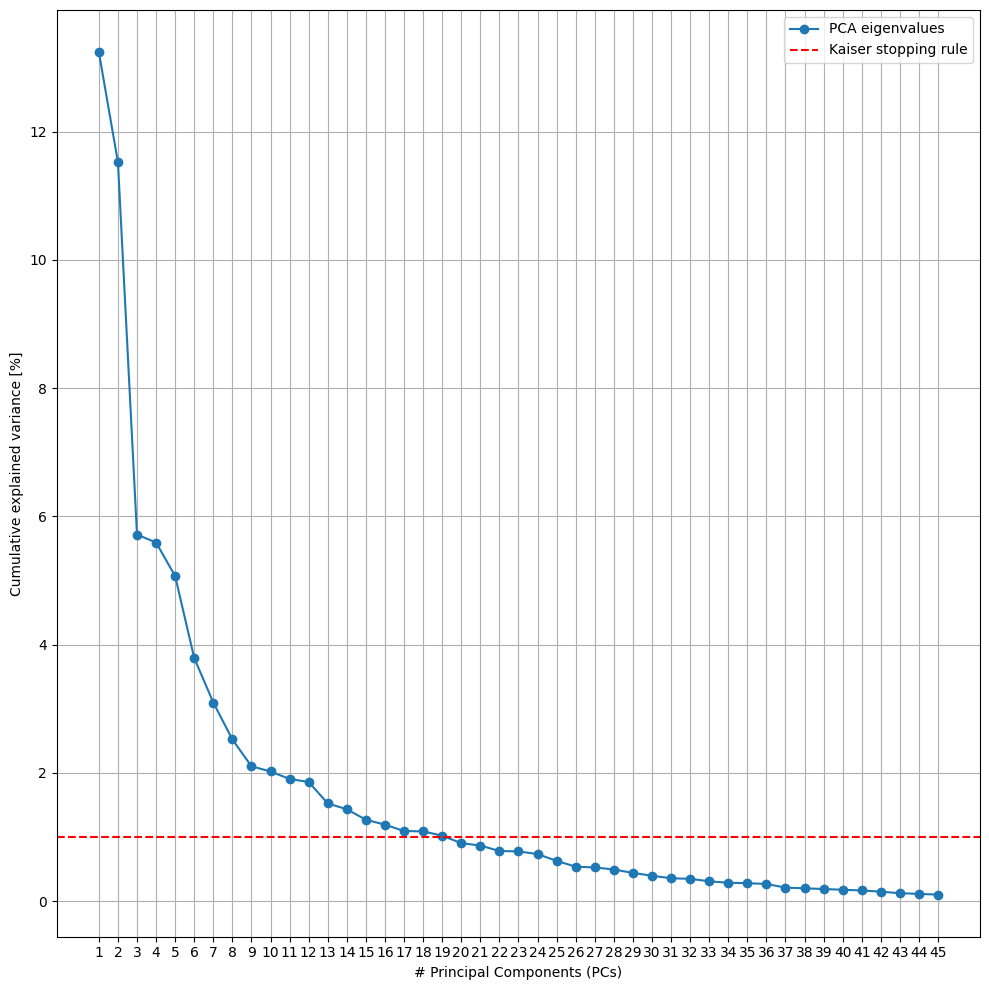

In [45]:
eigenvalues = pca.explained_variance_
plt.figure(figsize=((10,10)))
plt.plot(eigenvalues, marker='o',label='PCA eigenvalues')
plt.axhline(y = 1, color = 'r', linestyle = '--',label='Kaiser stopping rule')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.xticks([i for i in range(45)], [i for i in range(1,46)])
plt.grid()
#plt.title(f'45 PCs explain {round(perc_cumul_exp_var[44], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.legend()
plt.show()

<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
C:\Users\marco\AppData\Local\Temp\ipykernel_1460\1898314153.py:20: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'18 PCs explain {round(perc_cumul_exp_var[17], 2)}% of $\sigma^2$')


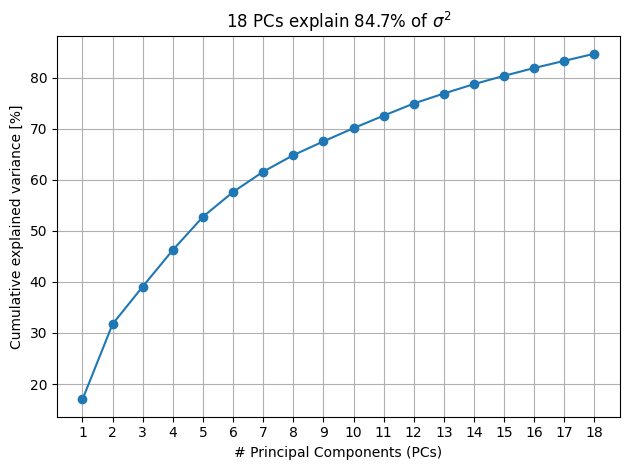

In [9]:
pca = PCA(n_components=18)
pca.fit(df_stand)

# describe how much of the dataset variability is indicated by a given amount of features
explained_variance = pca.explained_variance_ratio_

# evaluate the total dataset variability while increasing the variables
cumul_exp_var = np.cumsum(explained_variance)

# percentage value to better understand the best number of components
perc_cumul_exp_var = cumul_exp_var * 100

# make the plot of cumulative explained variance wrt number of components
plt.figure()
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.xticks([i for i in range(18)], [i for i in range(1,19)])
plt.grid()
plt.title(f'18 PCs explain {round(perc_cumul_exp_var[17], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.show()

In [74]:
pca = PCA(n_components=18, random_state=15)

# transform the original data into PCA components
df_stand_pca = pca.fit_transform(df_stand)

# create the new dataset
df_pca = pd.DataFrame(df_stand_pca)

In [75]:
filt2=df['num_packet_loss']==0
df['label']=1
df.loc[filt2,'label']=0

df_pca['label']= df['label']
df_pca['software']= df['software']
df_pca['p_type']= df['p_type']


In [54]:
df_pca.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,label,software,p_type
0,1.190429,-0.564056,-0.160225,2.108778,1.775066,-1.550925,-0.069684,-1.015415,-3.955315,2.924319,...,-0.836141,0.051808,-0.229513,-0.645500,1.179794,-0.129692,1.868831,0,webrtc,114
1,2.442997,0.763822,-0.127877,1.738731,3.036528,2.242526,1.315829,-0.968151,-1.343555,-0.912037,...,-0.825436,-0.777828,1.104533,-1.134835,2.194268,-0.513220,-1.137731,0,webrtc,114
2,2.783258,0.683389,0.005515,-0.657782,2.253210,0.188337,0.732626,-0.979509,-2.210315,-1.051178,...,-0.554721,0.311641,-0.147128,-0.546387,2.013665,0.013550,0.462823,0,webrtc,114
3,2.579452,1.572834,-0.101488,1.128718,2.090091,-1.775567,1.684673,-0.473399,-3.376811,1.969835,...,-0.185087,-0.503434,0.207775,-0.652570,1.398769,-0.426446,0.442697,0,webrtc,114
4,1.596634,0.974999,-0.019239,-0.139089,1.807267,0.775146,0.177477,-0.840095,-2.864003,0.386472,...,-0.012524,-0.601197,-0.318810,-0.393013,1.786341,0.134957,-0.142413,0,webrtc,114
5,0.798588,1.061603,0.045790,-1.325742,2.259556,0.805136,0.047069,-0.211884,-3.274887,2.289316,...,1.025907,-0.514187,-0.325719,-0.711922,2.122694,0.814012,0.720081,0,webrtc,114
6,1.154679,1.294817,0.039856,-1.344378,2.620908,0.209377,-0.226909,0.125100,-1.479255,-0.879348,...,-1.656363,-0.421345,-0.139061,-0.783528,1.827405,0.965031,0.508956,0,webrtc,114
7,0.823001,1.383815,0.011205,-0.667289,1.847130,1.098252,-0.276211,-0.533886,-2.246384,0.056741,...,-0.573857,-0.725020,-0.574424,-0.569542,1.393269,0.963302,1.070373,0,webrtc,114
8,0.709152,1.572438,0.064353,-1.662566,2.534854,0.279627,-0.691449,0.134238,-1.048888,-2.390915,...,0.794115,-0.522473,-0.373249,-0.639728,2.087872,1.083723,0.435736,0,webrtc,114
9,0.498781,1.952257,0.042896,-1.452790,2.865269,-0.288470,0.284277,0.032080,-1.670289,-1.160629,...,-1.641148,-0.162554,-0.172677,-0.810423,1.673309,1.081211,0.962596,0,webrtc,114


In [56]:
df_pca.shape

(2137927, 21)

### <ins>Point 3.</ins>

In [12]:
lossy_components = df_pca['label']==1
lossless_components = df_pca['label']==0

n_samples_lossy = random.sample(sorted(df_pca.loc[lossy_components].index),1000)
n_samples_lossless = random.sample(sorted(df_pca.loc[lossless_components].index),1000)
#n_samples_label = sorted (list(n_samples_lossy) + list(n_samples_lossless))


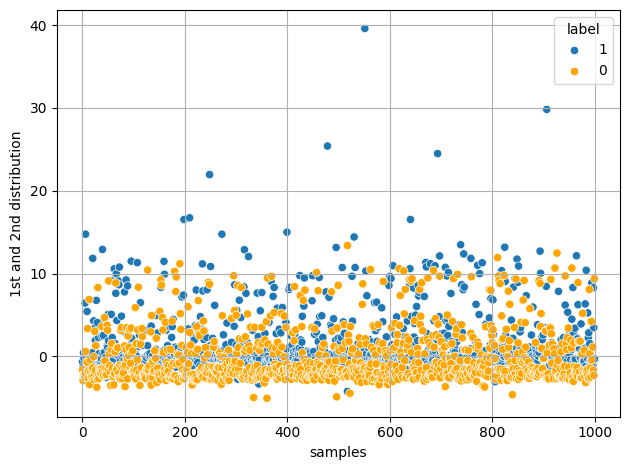

In [13]:
plt.figure()
sns.scatterplot(data=df_pca.loc[n_samples_lossy], x=list(range(0,1000)),y=1, marker='o',hue='label')
sns.scatterplot(data=df_pca.loc[n_samples_lossless], x=list(range(0,1000)),y=1, marker='o',hue='label', palette=['orange'])
plt.xlabel('samples')
plt.ylabel('1st and 2nd distribution')
#plt.xticks([i for i in range(18)], [i for i in range(1,19)])
plt.grid()
#plt.title(f'45 PCs explain {round(perc_cumul_exp_var[17], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.show()

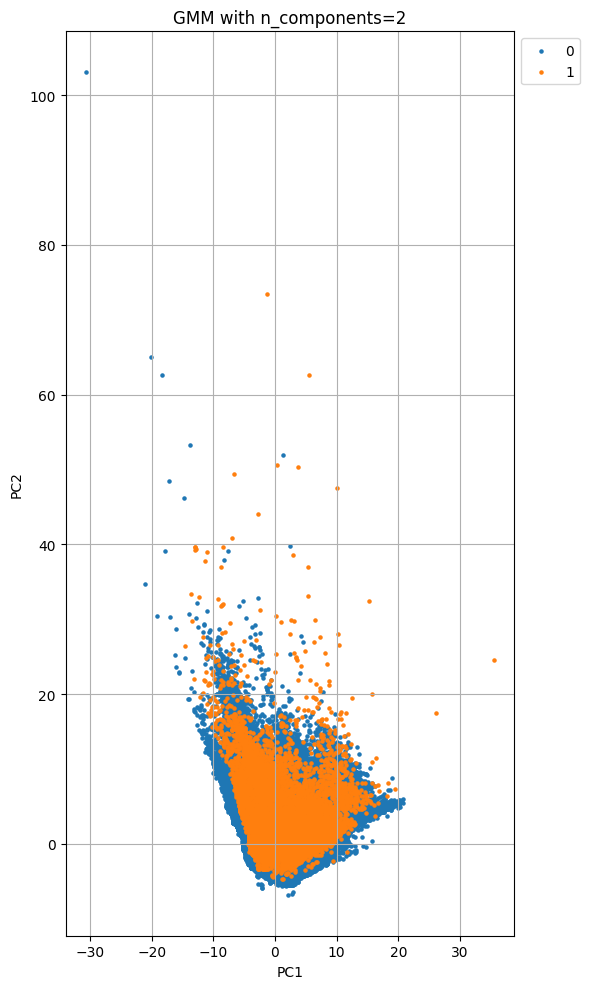

In [71]:
plt.figure(figsize=(6, 10))

for i in np.unique(df_pca.label):
    subdf = df_pca[df_pca.label==i]
    plt.scatter(subdf['0'], subdf['1'], label=i, s=5)
plt.grid()
lgnd = plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GMM with n_components=2')

plt.tight_layout()
plt.show()

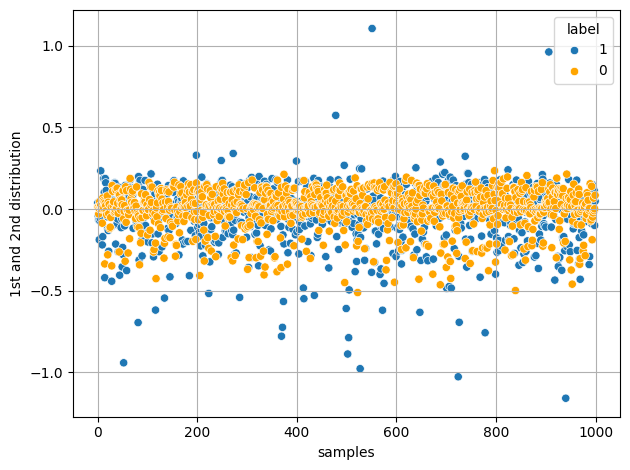

In [14]:
plt.figure()
sns.scatterplot(data=df_pca.loc[n_samples_lossy], x=list(range(0,1000)),y=2, marker='o',hue='label')
sns.scatterplot(data=df_pca.loc[n_samples_lossless], x=list(range(0,1000)),y=2, marker='o',hue='label', palette=['orange'])
plt.xlabel('samples')
plt.ylabel('1st and 2nd distribution')
#plt.xticks([i for i in range(18)], [i for i in range(1,19)])
plt.grid()
#plt.title(f'45 PCs explain {round(perc_cumul_exp_var[17], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.show()

In [15]:
webrtc_components = df_pca['software']=='webrtc'
webex_components = df_pca['software']=='webex'

n_samples_webrtc = random.sample(sorted(df_pca.loc[webrtc_components].index),1000)
n_samples_webex = random.sample(sorted(df_pca.loc[webex_components].index),1000)
#n_samples_software = sorted (list(n_samples_webrtc) + list(n_samples_webex))

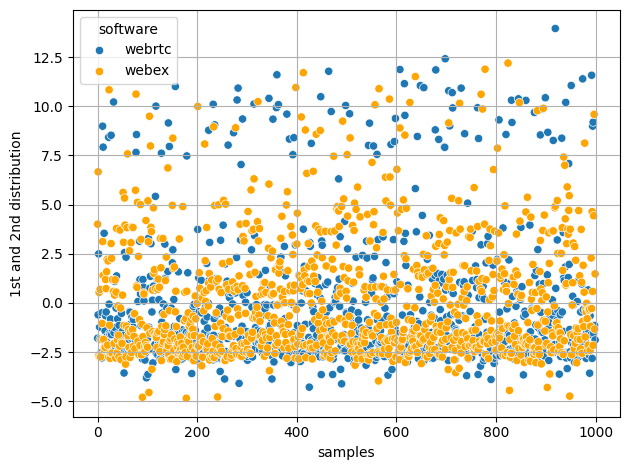

In [16]:
plt.figure()
sns.scatterplot(data=df_pca.loc[n_samples_webrtc], x=list(range(0,1000)),y=1, marker='o',hue='software')
sns.scatterplot(data=df_pca.loc[n_samples_webex], x=list(range(0,1000)),y=1, marker='o',hue='software', palette=['orange'])
plt.xlabel('samples')
plt.ylabel('1st and 2nd distribution')
#plt.xticks([i for i in range(18)], [i for i in range(1,19)])
plt.grid()
#plt.title(f'45 PCs explain {round(perc_cumul_exp_var[17], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.show()

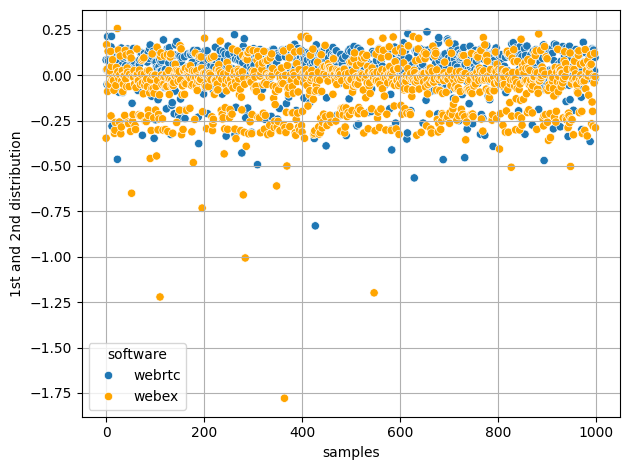

In [17]:
plt.figure()
sns.scatterplot(data=df_pca.loc[n_samples_webrtc], x=list(range(0,1000)),y=2, marker='o',hue='software')
sns.scatterplot(data=df_pca.loc[n_samples_webex], x=list(range(0,1000)),y=2, marker='o',hue='software', palette=['orange'])
plt.xlabel('samples')
plt.ylabel('1st and 2nd distribution')
#plt.xticks([i for i in range(18)], [i for i in range(1,19)])
plt.grid()
#plt.title(f'45 PCs explain {round(perc_cumul_exp_var[17], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.show()

In [76]:
df_pca.head(1)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,label,software,p_type
0,1.190429,-0.564056,-0.160225,2.108778,1.775066,-1.550925,-0.069684,-1.015415,-3.955315,2.924319,...,-0.836141,0.051808,-0.229513,-0.6455,1.179794,-0.129692,1.868831,0,webrtc,114


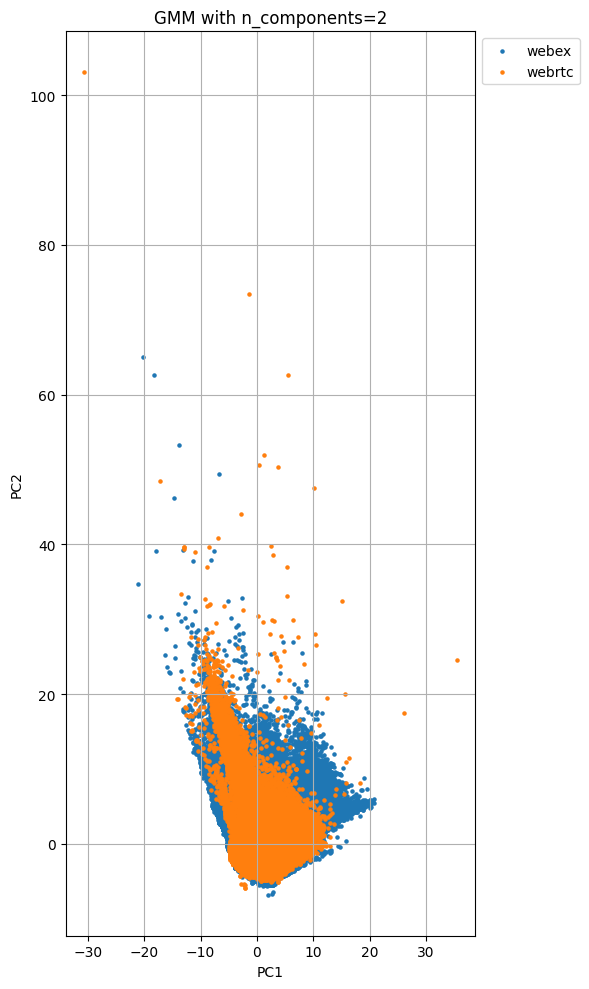

In [78]:
plt.figure(figsize=(6, 10))

for i in np.unique(df_pca.software):
    subdf = df_pca[df_pca.software==i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
lgnd = plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GMM with n_components=2')

plt.tight_layout()
plt.show()

In [18]:
ninety6_components = df_pca['p_type']==96
ninety7_components = df_pca['p_type']==97
oneH_components = df_pca['p_type']==100
oneH1_components = df_pca['p_type']==101
oneH11_components = df_pca['p_type']==111
oneH12_components = df_pca['p_type']==112
oneH14_components = df_pca['p_type']==114
oneH15_components = df_pca['p_type']==115
oneH17_components = df_pca['p_type']==117
oneH19_components = df_pca['p_type']==119
oneH24_components = df_pca['p_type']==124

n_samples_ninety6 = random.sample(sorted(df_pca.loc[ninety6_components].index),10)
n_samples_ninety7 = random.sample(sorted(df_pca.loc[ninety7_components].index),10)
n_samples_oneH = random.sample(sorted(df_pca.loc[oneH_components].index),10)
n_samples_oneH1 = random.sample(sorted(df_pca.loc[oneH1_components].index),10)
n_samples_oneH11 = random.sample(sorted(df_pca.loc[oneH11_components].index),10)
n_samples_oneH12 = random.sample(sorted(df_pca.loc[oneH12_components].index),10)
n_samples_oneH14 = random.sample(sorted(df_pca.loc[oneH14_components].index),10)
n_samples_oneH15 = random.sample(sorted(df_pca.loc[oneH15_components].index),10)
n_samples_oneH17 = random.sample(sorted(df_pca.loc[oneH17_components].index),10)
n_samples_oneH19 = random.sample(sorted(df_pca.loc[oneH19_components].index),10)
n_samples_oneH24 = random.sample(sorted(df_pca.loc[oneH24_components].index),10)


n_samples_p_type = (list(n_samples_ninety6)) + (list(n_samples_ninety7)) + (list(n_samples_oneH)) + (list(n_samples_oneH1)) + (list(n_samples_oneH11)) + (list(n_samples_oneH12)) + (list(n_samples_oneH14)) + (list(n_samples_oneH15))+ (list(n_samples_oneH17)) + (list(n_samples_oneH19)) + (list(n_samples_oneH24))

In [110]:
set(df_pca['p_type'])

{96, 97, 100, 101, 111, 112, 114, 115, 117, 119, 124}

C:\Users\marco\AppData\Local\Temp\ipykernel_1460\3005461443.py:6: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df_pca.loc[n_samples_oneH11], x=list(range(0,10)),y=1, marker='o',hue='software', palette=['yellow'])


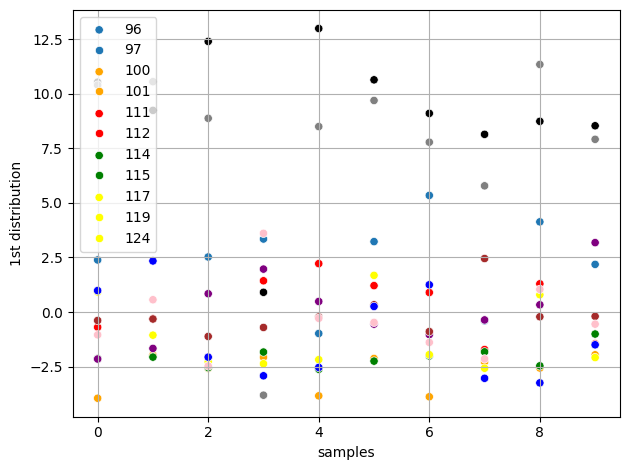

In [19]:
plt.figure()
sns.scatterplot(data=df_pca.loc[n_samples_ninety6], x=list(range(0,10)),y=1, marker='o',hue='software')
sns.scatterplot(data=df_pca.loc[n_samples_ninety7], x=list(range(0,10)),y=1, marker='o',hue='software', palette=['orange'])
sns.scatterplot(data=df_pca.loc[n_samples_oneH], x=list(range(0,10)),y=1, marker='o',hue='software', palette=['red'])
sns.scatterplot(data=df_pca.loc[n_samples_oneH1], x=list(range(0,10)),y=1, marker='o',hue='software', palette=['green'])
sns.scatterplot(data=df_pca.loc[n_samples_oneH11], x=list(range(0,10)),y=1, marker='o',hue='software', palette=['yellow'])
sns.scatterplot(data=df_pca.loc[n_samples_oneH12], x=list(range(0,10)),y=1, marker='o',hue='software', palette=['purple'])
sns.scatterplot(data=df_pca.loc[n_samples_oneH14], x=list(range(0,10)),y=1, marker='o',hue='software', palette=['black'])
sns.scatterplot(data=df_pca.loc[n_samples_oneH15], x=list(range(0,10)),y=1, marker='o',hue='software', palette=['brown'])
sns.scatterplot(data=df_pca.loc[n_samples_oneH17], x=list(range(0,10)),y=1, marker='o',hue='software', palette=['blue'])
sns.scatterplot(data=df_pca.loc[n_samples_oneH19], x=list(range(0,10)),y=1, marker='o',hue='software', palette=['pink'])
sns.scatterplot(data=df_pca.loc[n_samples_oneH24], x=list(range(0,10)),y=1, marker='o',hue='software', palette=['grey'])

plt.xlabel('samples')
plt.ylabel('1st distribution')
#plt.xticks([i for i in range(18)], [i for i in range(1,19)])
plt.grid()
#plt.title(f'45 PCs explain {round(perc_cumul_exp_var[17], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.legend(list(set(df_pca['p_type'])), loc='best', draggable=True)
plt.show()

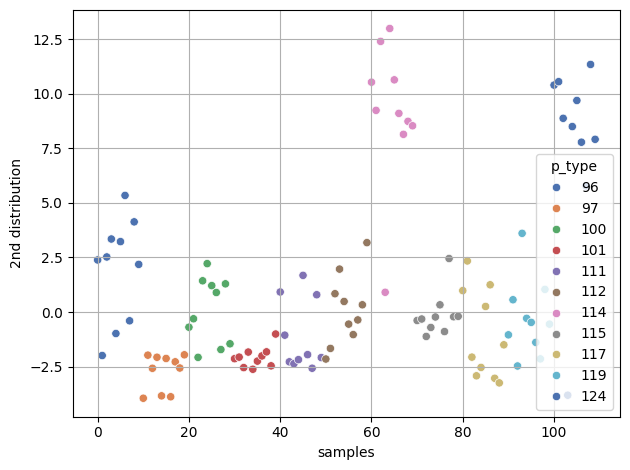

In [20]:
plt.figure()
sns.scatterplot(data=df_pca.loc[n_samples_p_type], x=list(range(0,len(n_samples_p_type))),y=1, marker='o',hue='p_type',legend='full',palette='deep')
plt.xlabel('samples')
plt.ylabel('2nd distribution')
#plt.xticks([i for i in range(18)], [i for i in range(1,19)])
plt.grid()
#plt.title(f'45 PCs explain {round(perc_cumul_exp_var[17], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.show()

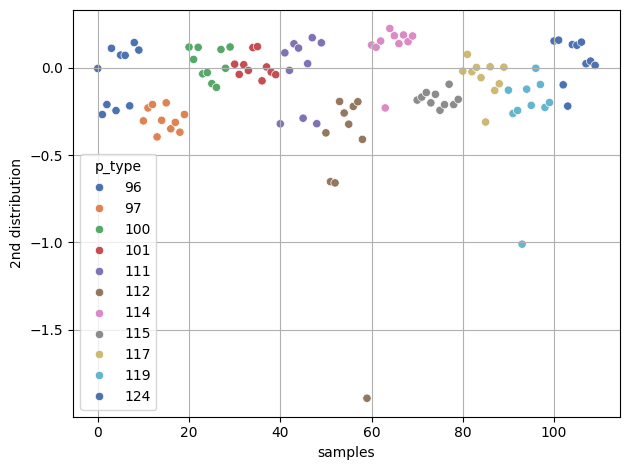

In [21]:
plt.figure()
sns.scatterplot(data=df_pca.loc[n_samples_p_type], x=list(range(0,len(n_samples_p_type))),y=2, marker='o',hue='p_type',legend='full',palette='deep')
plt.xlabel('samples')
plt.ylabel('2nd distribution')
#plt.xticks([i for i in range(18)], [i for i in range(1,19)])
plt.grid()
#plt.title(f'45 PCs explain {round(perc_cumul_exp_var[17], 2)}% of $\sigma^2$')
plt.tight_layout()
plt.show()

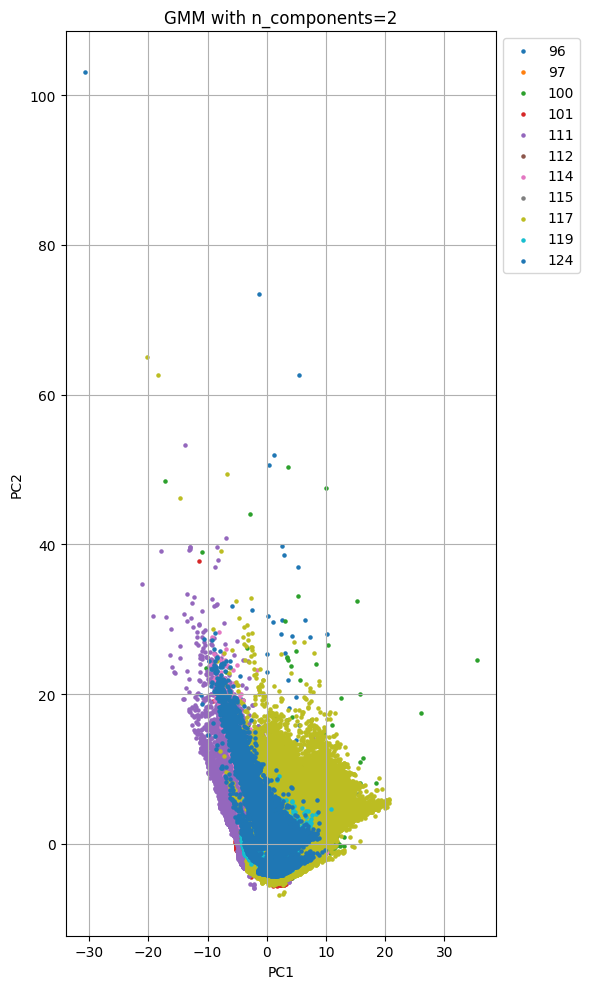

In [79]:
plt.figure(figsize=(6, 10))

for i in np.unique(df_pca.p_type):
    subdf = df_pca[df_pca.p_type==i]
    plt.scatter(subdf[0], subdf[1], label=i, s=5)
plt.grid()
lgnd = plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GMM with n_components=2')

plt.tight_layout()
plt.show()

### <ins>Point 4.</ins>

### GaussianMixture Clustering

In [68]:
# Define the model to be used
gmm = GaussianMixture(n_components=2, init_params='kmeans')

In [ ]:
#df_pca.columns = df_pca.columns.astype(str)
cl_labels3 = gmm.fit_predict(df_stand) # Get clusters ID

In [56]:
# Unsupervised metric
#silhouette  = silhouette_score(df_stand, cl_labels3)
log_l = gmm.score(df_stand)
# Supervised metrics
y = df_pca['label'].values
ri = rand_score(np.ravel(y), cl_labels3)
ari = adjusted_rand_score(np.ravel(y), cl_labels3)

In [57]:
# Report effective size
print("Effetive size of each cluster: ", gmm.weights_)
# Report usupervised and supervised metric
print(f'GMM total log-likelihood score: {round(log_l, 2)}')
#print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

Effetive size of each cluster:  [0.61996875 0.38003125]
GMM total log-likelihood score: -23.31
RI: 0.52
ARI: -0.01


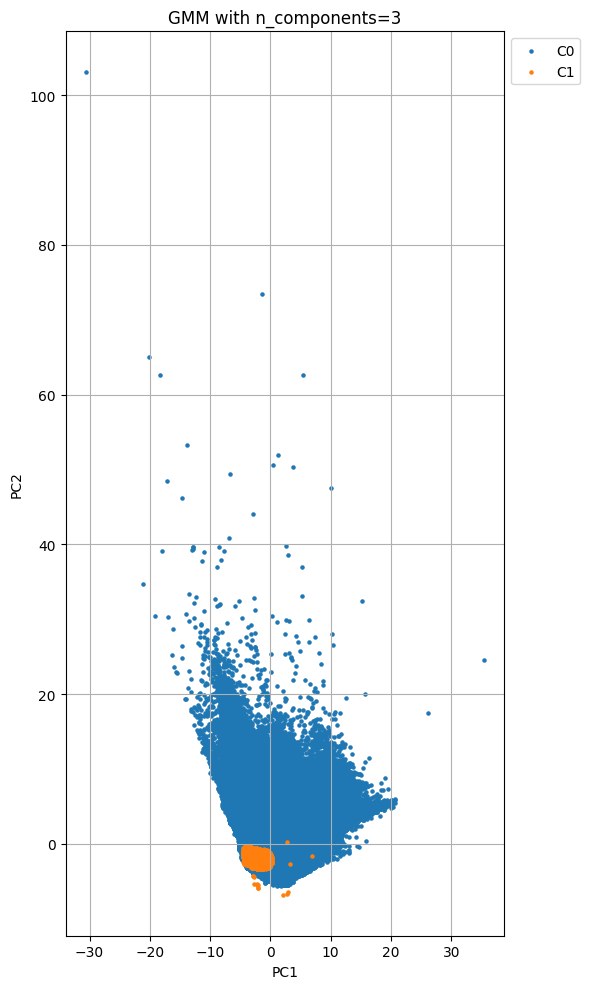

In [66]:
df_pca['cid_comp'] = [f'C{x}' for x in cl_labels3]
df_pca['label'] = y.reshape(-1)

plt.figure(figsize=(6, 10))

for i in np.unique(df_pca.cid_comp):
    subdf = df_pca[df_pca.cid_comp==i]
    plt.scatter(subdf['0'], subdf['1'], label=i, s=5)
plt.grid()
lgnd = plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('GMM with n_components=2')

plt.tight_layout()
plt.show()

In [67]:
subdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,cid_comp,label
5337,-2.426705,-1.019060,-0.039407,0.301551,0.260251,-2.137470,1.987099,-0.569918,-0.253395,0.305627,1.557883,0.138619,-0.175433,0.935488,-0.888585,1.518231,-1.008117,0.336017,C1,0
5338,-2.020910,-1.799267,0.094853,-2.321426,1.065408,-2.959319,1.425519,1.231581,-0.158330,1.455296,-1.112223,-3.312704,0.153490,0.496046,-0.846798,2.148727,-0.211214,0.794034,C1,0
5339,-2.785405,-1.251752,-0.045991,0.482197,-0.028077,-1.423079,1.469133,0.349595,-0.435850,-1.470206,1.353582,0.110821,0.046802,0.038799,-0.443619,1.324996,-0.026833,0.709952,C1,0
5340,-2.833614,-2.230433,-0.003687,-0.403984,0.264137,-2.584097,0.187946,0.428584,-0.045114,0.344180,1.907603,0.176698,-1.102534,-0.355928,-0.364428,1.626074,-0.169605,0.536186,C1,0
5341,-1.968697,-2.255863,0.098265,-2.287929,1.147045,-2.464175,0.229535,1.478872,0.281050,0.066145,-1.151223,-0.552981,-0.383334,0.071503,-0.726437,2.514654,0.050085,0.846194,C1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137921,-1.653283,-1.955750,-0.000984,-0.047861,-1.569803,-1.151299,1.310944,-0.949740,-0.469090,0.071398,0.355550,0.076110,-0.324676,0.582297,0.695451,-0.848977,-0.122797,-1.063580,C1,0
2137922,-1.033838,-1.985330,-0.009225,-0.013768,-1.405232,-2.621099,1.304926,-1.226009,-0.522313,1.960811,0.565948,0.167776,-0.195323,0.601960,0.569240,-1.091218,-0.146547,-0.884373,C1,0
2137923,-1.452226,-2.488727,0.112586,-2.153055,0.058426,-0.585863,0.451100,0.754984,-0.122984,-0.293173,-2.422208,3.713513,0.757671,-0.059142,0.383295,-0.583436,1.221415,0.374358,C1,0
2137924,-1.266472,-1.838560,-0.014898,0.092406,-1.311019,-2.078580,1.265045,-0.998355,-0.275735,-0.172486,0.247808,0.176688,0.577642,-0.171708,0.795884,-1.728041,0.432418,0.233722,C1,0


### DBSCAN Clustering

In [ ]:
# DBSCAN

y = df_pca['label'].values

dbscan = DBSCAN()
cl_labels3 = dbscan.fit_predict(df_stand) # Get clusters ID

# Unsupervised metric
silhouette  = silhouette_score(df_stand, cl_labels3)
# Supervised metrics
ri = rand_score(np.ravel(y), cl_labels3)
ari = adjusted_rand_score(np.ravel(y), cl_labels3)

# Report number and size of each cluster
(unique, counts)=np.unique( cl_labels3, return_counts=True)
print("Number of clusters (including noise): ", len(unique))
print("Size of each cluster: ", counts)
# Report usupervised and supervised metric
print(f'Silhouette: {round(silhouette, 2)}')
print(f'RI: {round(ri, 2)}')
print(f'ARI: {round(ari, 2)}')

### <ins>Point 5.</ins>